In [ ]:
"""
Authors: Tetsuya Kawakita and Susie Park
Date: 11/20/2024
Topic: Drinking water quality data in NYC distribution
"""

'\nAuthors: Tetsuya Kawakita and Susie Park\nDate: 11/20/2024\nTopic: Drinking water quality data in NYC distribution\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import pyproj
from scipy.ndimage import gaussian_filter
import branca.colormap as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [ ]:
# Water Quality Standards table of MCL: https://www.health.ny.gov/environmental/water/drinking/annual_water_quality_report/docs/table1.pdf
# Are there any relations between contaminant concentrations (e.g. chlorine and e.coli)
# Gaussian mixture models
#income vs water quality (Bishop also likes this one)
#Geographic location vs water quality. Like a heatmap of ecoli levels across NYC
#Use scikitlearn

In [ ]:
def replace_strings_with_zero(arr):
    """Replaces string values in an array with 0."""

    for i in range(len(arr)):
        if isinstance(arr[i], str):
            arr[i] = 0
    return arr

def clean_numeric_column(column):
    column = column.replace(to_replace=r'<([0-9.]+)', value=r'\1', regex=True)
    column = column.replace(to_replace=r'>([0-9.]+)', value=r'\1', regex=True)
    return column.astype(float)

In [ ]:
water_data = pd.read_csv('/content/drive/My Drive/CHEME DATA ANALYSIS FINAL PROJECT/Drinking_Water_Quality_Distribution_Monitoring_Data.csv')
site_data = pd.read_excel('/content/drive/My Drive/CHEME DATA ANALYSIS FINAL PROJECT/OpenData_Distribution_Water_Quality_Sampling_Sites_Updated_2021-0618.xlsx')

water_data.columns = water_data.columns.str.strip()
site_data.columns = site_data.columns.str.strip()

data = water_data.merge(site_data, left_on='Sample Site', right_on='Sample Site', how='inner')

<ipython-input-22-419c60d98504>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  water_data = pd.read_csv('/content/drive/My Drive/CHEME DATA ANALYSIS FINAL PROJECT/Drinking_Water_Quality_Distribution_Monitoring_Data.csv')


In [ ]:
residual_chlorine_data = data['Residual Free Chlorine (mg/L)'].values
residual_chlorine_data = replace_strings_with_zero(residual_chlorine_data)
residual_chlorine_data = np.where(np.logical_or(residual_chlorine_data <= 0,residual_chlorine_data == ''), 0, residual_chlorine_data)

turbidity_data = data['Turbidity (NTU)'].values
turbidity_data = pd.to_numeric(turbidity_data)
turbidity_data = np.where(np.logical_or(turbidity_data <= 0,turbidity_data == ''), 0, turbidity_data)

fluoride_data = data['Fluoride (mg/L)'].replace('', pd.NA)
fluoride_data = pd.to_numeric(fluoride_data, errors='coerce').fillna(0)
fluoride_data = np.where(np.logical_or(fluoride_data <= 0,fluoride_data == ''),0,fluoride_data)

coliform_data = data['Coliform (Quanti-Tray) (MPN /100mL)'].values
coliform_data = np.where(coliform_data=='>200.5',200,coliform_data)
coliform_data = pd.to_numeric(coliform_data, errors='coerce')
coliform_data = np.where(np.logical_or(coliform_data <= 0,coliform_data == ''),0,coliform_data)

ecoli_data = data['E.coli(Quanti-Tray) (MPN/100mL)'].values
ecoli_data = pd.to_numeric(ecoli_data, errors='coerce')
ecoli_data = np.nan_to_num(ecoli_data, nan=0)
ecoli_data = np.where(np.logical_or(ecoli_data <= 0,ecoli_data == '',ecoli_data =='nan'),0,ecoli_data)

In [ ]:
N = len(residual_chlorine_data)
sample_size_array = np.linspace(0,N,N)

Text(0, 0.5, 'E.coli (MPN/100mL)')

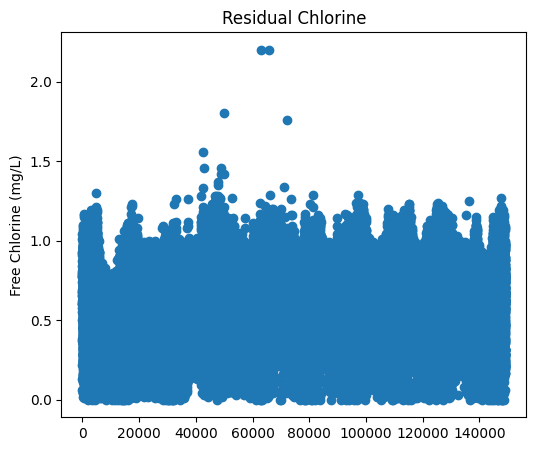

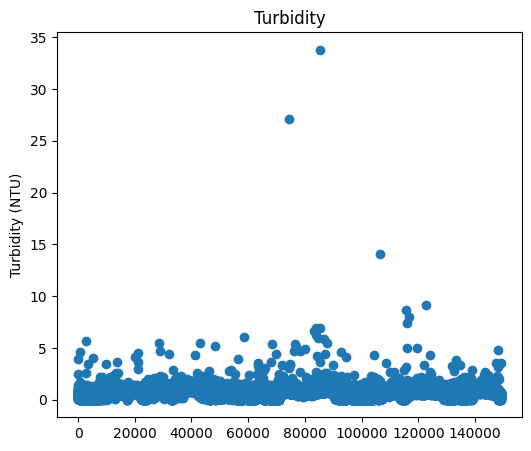

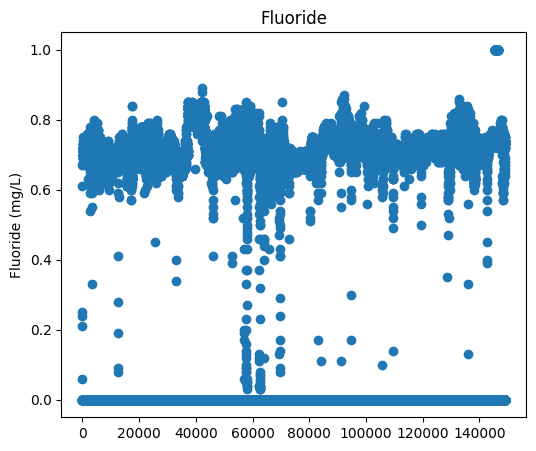

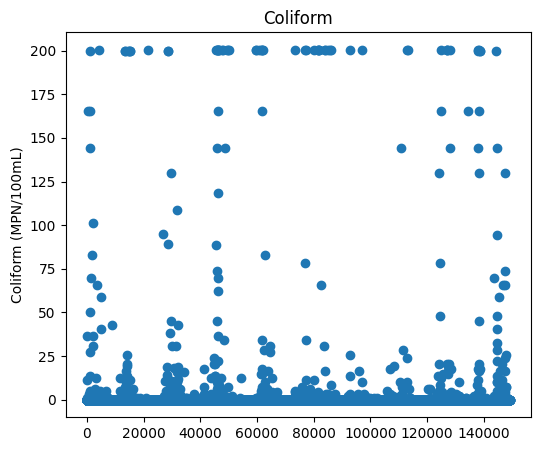

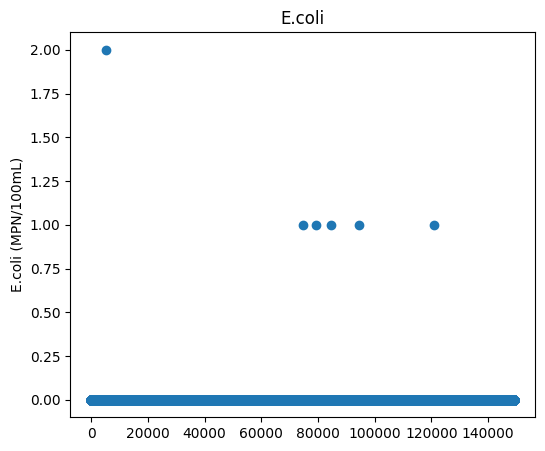

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(sample_size_array,residual_chlorine_data)
plt.title('Residual Chlorine')
plt.ylabel('Free Chlorine (mg/L)')

plt.figure(figsize=(6, 5))
plt.scatter(sample_size_array,turbidity_data)
plt.title('Turbidity')
plt.ylabel('Turbidity (NTU)')

plt.figure(figsize=(6, 5))
plt.scatter(sample_size_array,fluoride_data)
plt.title('Fluoride')
plt.ylabel('Fluoride (mg/L)')

plt.figure(figsize=(6, 5))
plt.scatter(sample_size_array,coliform_data)
plt.title('Coliform')
plt.ylabel('Coliform (MPN/100mL)')

plt.figure(figsize=(6, 5))
plt.scatter(sample_size_array,ecoli_data)
plt.title('E.coli')
plt.ylabel('E.coli (MPN/100mL)')

Text(0, 0.5, 'E.coli (MPN/100mL)')

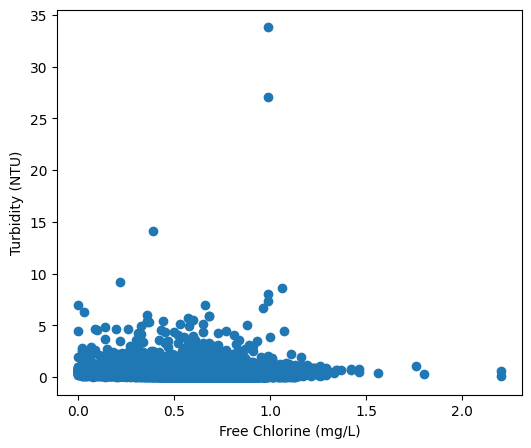

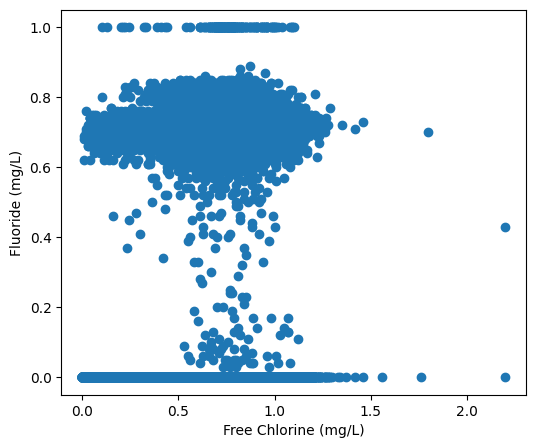

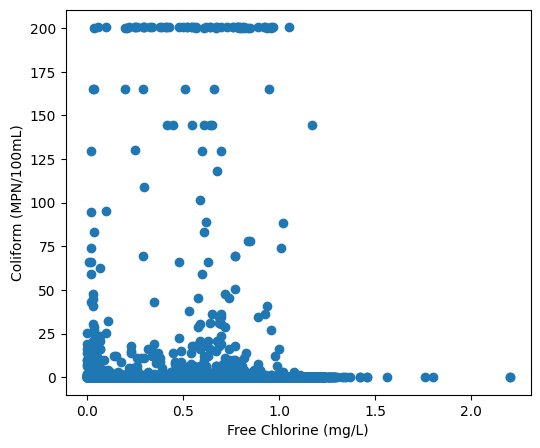

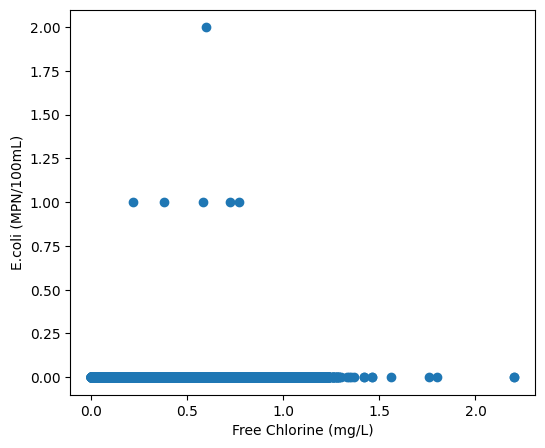

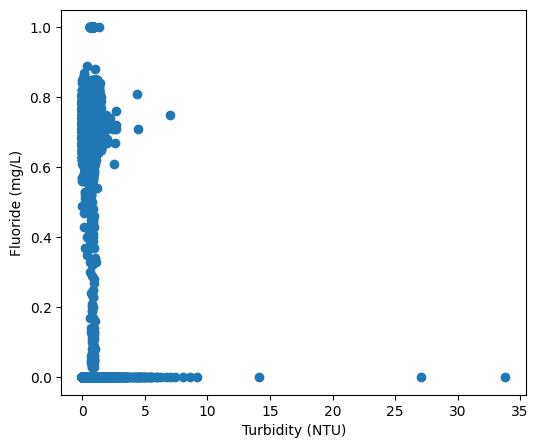

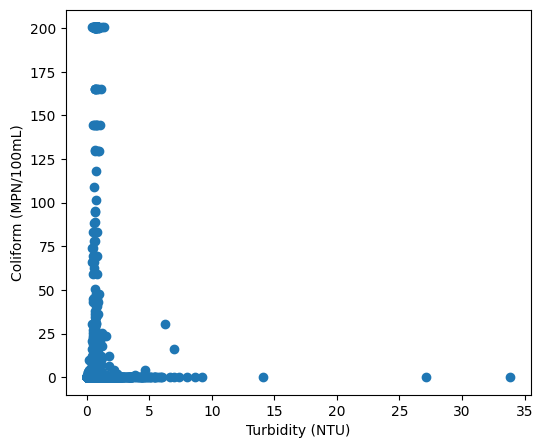

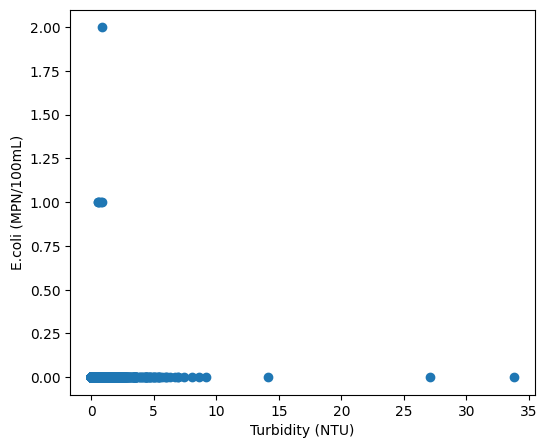

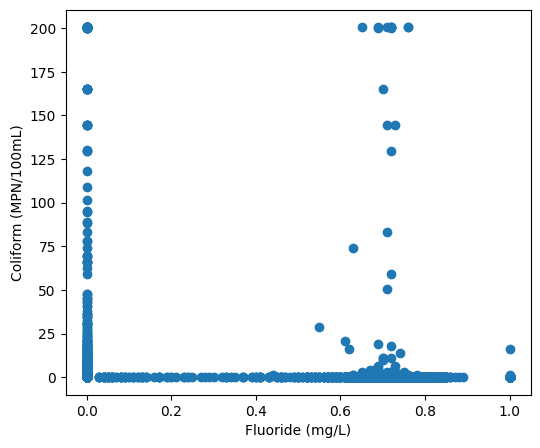

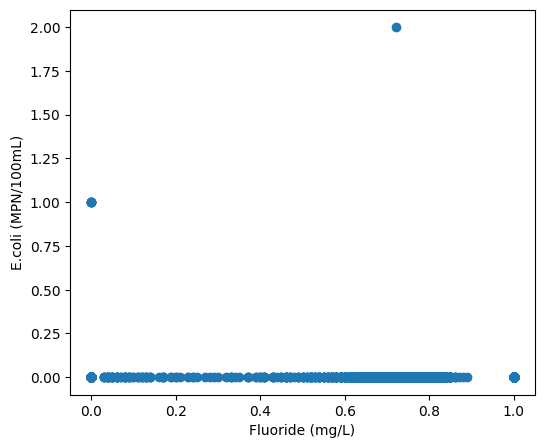

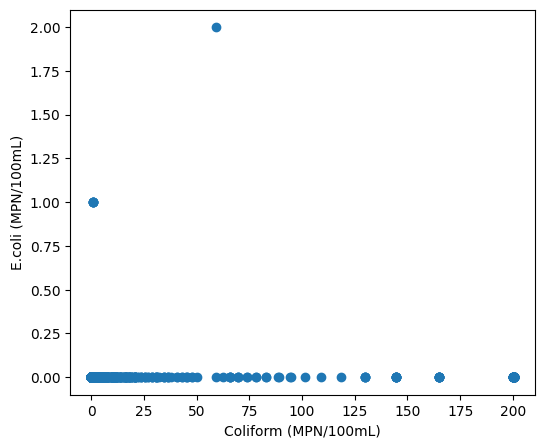

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(residual_chlorine_data,turbidity_data)
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Turbidity (NTU)')

plt.figure(figsize=(6, 5))
plt.scatter(residual_chlorine_data,fluoride_data)
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Fluoride (mg/L)')

plt.figure(figsize=(6, 5))
plt.scatter(residual_chlorine_data,coliform_data)
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Coliform (MPN/100mL)')

plt.figure(figsize=(6, 5))
plt.scatter(residual_chlorine_data,ecoli_data)
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('E.coli (MPN/100mL)')

plt.figure(figsize=(6, 5))
plt.scatter(turbidity_data, fluoride_data)
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Fluoride (mg/L)')

plt.figure(figsize=(6, 5))
plt.scatter(turbidity_data,coliform_data)
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Coliform (MPN/100mL)')

plt.figure(figsize=(6, 5))
plt.scatter(turbidity_data,ecoli_data)
plt.xlabel('Turbidity (NTU)')
plt.ylabel('E.coli (MPN/100mL)')

plt.figure(figsize=(6, 5))
plt.scatter(fluoride_data, coliform_data)
plt.xlabel('Fluoride (mg/L)')
plt.ylabel('Coliform (MPN/100mL)')

plt.figure(figsize=(6, 5))
plt.scatter(fluoride_data,ecoli_data)
plt.xlabel('Fluoride (mg/L)')
plt.ylabel('E.coli (MPN/100mL)')

plt.figure(figsize=(6, 5))
plt.scatter(coliform_data,ecoli_data)
plt.xlabel('Coliform (MPN/100mL)')
plt.ylabel('E.coli (MPN/100mL)')

In [ ]:
print(data.head())

   Sample Number Sample Date Sample Time Sample Site Sample class  \
0      201655703  08/09/2016       10:31       43250   Compliance   
1      201655704  08/09/2016       11:27       46850   Compliance   
2      201655705  08/09/2016       10:14       50200  Operational   
3      201655706  08/09/2016       12:12       50300  Operational   
4      201655707  08/09/2016       10:17       76550   Compliance   

   Residual Free Chlorine (mg/L)  Turbidity (NTU) Fluoride (mg/L)  \
0                           0.68             0.74             NaN   
1                           0.81             1.45             NaN   
2                           0.79             0.74             NaN   
3                           0.92             0.63             NaN   
4                           0.06             0.60             NaN   

  Coliform (Quanti-Tray) (MPN /100mL)  E.coli(Quanti-Tray) (MPN/100mL)  \
0                                   0                              0.0   
1                     

In [ ]:
# Clean the data

data["Residual Free Chlorine (mg/L)"] = replace_strings_with_zero(data["Residual Free Chlorine (mg/L)"])
data["Residual Free Chlorine (mg/L)"] = np.where(np.logical_or(data["Residual Free Chlorine (mg/L)"] <= 0,data["Residual Free Chlorine (mg/L)"] == ''), 0, data["Residual Free Chlorine (mg/L)"])

data["Turbidity (NTU)"] = pd.to_numeric(data["Turbidity (NTU)"])
data["Turbidity (NTU)"] = np.where(np.logical_or(data["Turbidity (NTU)"] <= 0,data["Turbidity (NTU)"] == ''), 0, data["Turbidity (NTU)"])

data["Fluoride (mg/L)"] = pd.to_numeric(data["Fluoride (mg/L)"], errors='coerce').fillna(0)
data["Fluoride (mg/L)"] = np.where(np.logical_or(data["Fluoride (mg/L)"] <= 0,fluoride_data == ''),0,data["Fluoride (mg/L)"])

data["Coliform (Quanti-Tray) (MPN /100mL)"] = np.where(data["Coliform (Quanti-Tray) (MPN /100mL)"]==">200.5",200,data["Coliform (Quanti-Tray) (MPN /100mL)"])
data["Coliform (Quanti-Tray) (MPN /100mL)"] = pd.to_numeric(data["Coliform (Quanti-Tray) (MPN /100mL)"], errors='coerce')
data["Coliform (Quanti-Tray) (MPN /100mL)"] = np.where(np.logical_or(data["Coliform (Quanti-Tray) (MPN /100mL)"] <=0, data["Coliform (Quanti-Tray) (MPN /100mL)"] == ''),0,data["Coliform (Quanti-Tray) (MPN /100mL)"])

data["E.coli(Quanti-Tray) (MPN/100mL)"] = pd.to_numeric(data["E.coli(Quanti-Tray) (MPN/100mL)"], errors='coerce')
data["E.coli(Quanti-Tray) (MPN/100mL)"] = np.nan_to_num(data["E.coli(Quanti-Tray) (MPN/100mL)"], nan=0)
data["E.coli(Quanti-Tray) (MPN/100mL)"] = np.where(np.logical_or(data["E.coli(Quanti-Tray) (MPN/100mL)"] <= 0,data["E.coli(Quanti-Tray) (MPN/100mL)"] == '',ecoli_data =='nan'),0,data["E.coli(Quanti-Tray) (MPN/100mL)"])

In [ ]:
# Define the coordinate transformation: NAD83 (EPSG:2263) to WGS84 (EPSG:4326)
project = pyproj.Transformer.from_crs("EPSG:2263", "EPSG:4326", always_xy=True)

# Create a base map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Apply the transformation
data["Longitude"], data["Latitude"] = project.transform(
    data["X - Coordinate"].values,
    data["Y - Coordinate"].values
)

# Prepare heat map data
heat_data_chlorine = data[["Latitude", "Longitude", "Residual Free Chlorine (mg/L)"]].dropna()
heat_data_chlorine_list = heat_data_chlorine.values.tolist()

# Create a linear colormap for the color bar
max_val = heat_data_chlorine["Residual Free Chlorine (mg/L)"].max()
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'],
                              vmin=0,
                              vmax=max_val,
                              caption="Residual Free Chlorine (mg/L)")

# Add the heat map layer
HeatMap(heat_data_chlorine_list, radius=10, blur=5, max_zoom=1,
        gradient={0.2: 'blue', 0.5: 'green', 0.8: 'yellow', 1.0: 'red'}).add_to(nyc_map)

# Add the color bar to the map
colormap.add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save("/content/drive/My Drive/CHEME DATA ANALYSIS FINAL PROJECT/NYC_chlorine_heatmap.html")
nyc_map

In [ ]:
# Create a base map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Prepare heat map data
heat_data_turbidity = data[["Latitude", "Longitude", "Turbidity (NTU)"]].dropna()
heat_data_turbidity_list = heat_data_turbidity.values.tolist()

# Create a linear colormap for the color bar
max_val = heat_data_turbidity["Turbidity (NTU)"].max()
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'],
                              vmin=0,
                              vmax=max_val,
                              caption="Turbidity (NTU)")

# Add the heat map layer
HeatMap(heat_data_turbidity_list, radius=10, blur=10, max_zoom=1,
        gradient={0.2: 'blue', 0.5: 'green', 0.8: 'yellow', 1.0: 'red'}).add_to(nyc_map)

# Add the color bar to the map
colormap.add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save("/content/drive/My Drive/CHEME DATA ANALYSIS FINAL PROJECT/NYC_turbidity_heatmap.html")
nyc_map

In [ ]:
# Create a base map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Prepare heat map data
heat_data_fluoride = data[["Latitude", "Longitude", "Fluoride (mg/L)"]].dropna()
heat_data_fluoride_list = heat_data_fluoride.values.tolist()

# Create a linear colormap for the color bar
max_val = heat_data_fluoride["Fluoride (mg/L)"].max()
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'],
                              vmin=0,
                              vmax=max_val,
                              caption="Fluoride (mg/L)")

# Add the heat map layer
HeatMap(heat_data_fluoride_list, radius=10, blur=10, max_zoom=1,
        gradient={0.2: 'blue', 0.5: 'green', 0.8: 'yellow', 1.0: 'red'}).add_to(nyc_map)

# Add the color bar to the map
colormap.add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save("/content/drive/My Drive/CHEME DATA ANALYSIS FINAL PROJECT/NYC_fluoride_heatmap.html")
nyc_map

In [ ]:
# Create a base map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Prepare heat map data
heat_data_coliform = data[["Latitude", "Longitude", "Coliform (Quanti-Tray) (MPN /100mL)"]].dropna()
heat_data_coliform_list = heat_data_coliform.values.tolist()

# Create a linear colormap for the color bar
max_val = heat_data_coliform["Coliform (Quanti-Tray) (MPN /100mL)"].max()
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'],
                              vmin=0,
                              vmax=max_val,
                              caption="Coliform (Quanti-Tray) (MPN /100mL)")

# Add the heat map layer
HeatMap(heat_data_coliform_list, radius=10, blur=10, max_zoom=1,
        gradient={0.2: 'blue', 0.5: 'green', 0.8: 'yellow', 1.0: 'red'}).add_to(nyc_map)

# Add the color bar to the map
colormap.add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save("/content/drive/My Drive/CHEME DATA ANALYSIS FINAL PROJECT/NYC_coliform_heatmap.html")
nyc_map

In [ ]:
# Create a base map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Prepare heat map data
heat_data_ecoli = data[["Latitude", "Longitude", "E.coli(Quanti-Tray) (MPN/100mL)"]].dropna()
heat_data_ecoli_list = heat_data_ecoli.values.tolist()

# Create a linear colormap for the color bar
max_val = heat_data_ecoli["E.coli(Quanti-Tray) (MPN/100mL)"].max()
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'],
                              vmin=0,
                              vmax=max_val,
                              caption="E.coli(Quanti-Tray) (MPN/100mL)")

# Add the heat map layer
HeatMap(heat_data_ecoli_list, radius=10, blur=10, max_zoom=1,
        gradient={0.2: 'blue', 0.5: 'green', 0.8: 'yellow', 1.0: 'red'}).add_to(nyc_map)

# Add the color bar to the map
colormap.add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save("/content/drive/My Drive/CHEME DATA ANALYSIS FINAL PROJECT/NYC_ecoli_heatmap.html")
nyc_map

In [ ]:
# Chlorine clustering data
Chlorine_data = data[['X - Coordinate', 'Y - Coordinate', 'Residual Free Chlorine (mg/L)']].dropna()
Chlorine_cluster = Chlorine_data[['X - Coordinate', 'Y - Coordinate', 'Residual Free Chlorine (mg/L)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=200, random_state=42)
kmeans_labels = kmeans.fit_predict(Chlorine_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=200, random_state=42)
gmm_labels = gmm.fit_predict(Chlorine_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Chlorine_data['X - Coordinate'], Chlorine_data['Y - Coordinate'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Chlorine Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Chlorine_data['X - Coordinate'], Chlorine_data['Y - Coordinate'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Chlorine Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

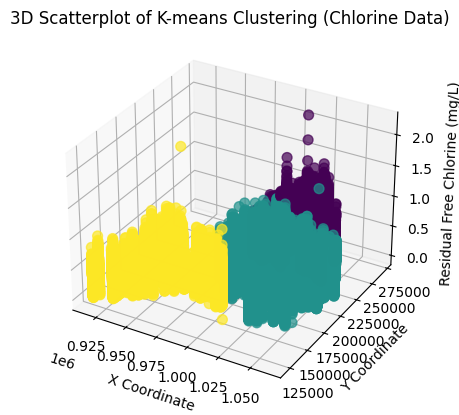

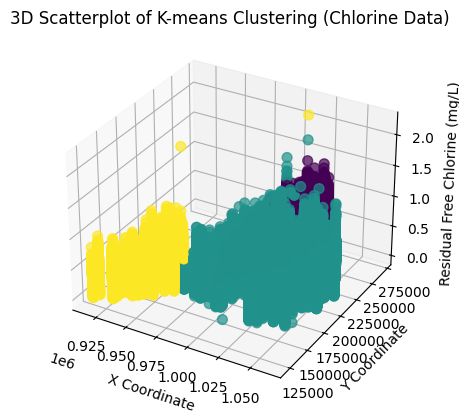

In [ ]:
# Come up with a hypothesis of what you are thinking. PCA (principle component analysis). How are things distributed? Need guiding question. Look at distribution of chlorine content. Chlorine content being higher in some bouroughs through the clustering.
# Go with GMM
# COme up with a model that can simulate this data and the clusters.
# Maybe leave out position.
# Try out clustering other features and then see if there are other clusters.
# Try many pairwise plots (e.g. chlorine and turbidity)
# PCA. Find linear combinations of features.

# Chlorine clustering data
Chlorine_data = data[['X - Coordinate', 'Y - Coordinate', 'Residual Free Chlorine (mg/L)']].dropna()
Chlorine_cluster = Chlorine_data[['X - Coordinate', 'Y - Coordinate', 'Residual Free Chlorine (mg/L)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Chlorine_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Chlorine_cluster)


# 3D Scatterplot for K-means clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with K-means labels
scatter = ax.scatter(Chlorine_data['X - Coordinate'],
                     Chlorine_data['Y - Coordinate'],
                     Chlorine_data['Residual Free Chlorine (mg/L)'],
                     c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)

# Set axis labels
ax.set_title('3D Scatterplot of K-means Clustering (Chlorine Data)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Residual Free Chlorine (mg/L)')

# Add color bar
#cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
#cbar.set_label('Cluster')

# 3D Scatterplot for Gaussian Mixture Model clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with Gaussian Mixture Model labels
scatter = ax.scatter(Chlorine_data['X - Coordinate'],
                     Chlorine_data['Y - Coordinate'],
                     Chlorine_data['Residual Free Chlorine (mg/L)'],
                     c=gmm_labels, cmap='viridis', s=50, alpha=0.7)

# Set axis labels
ax.set_title('3D Scatterplot of K-means Clustering (Chlorine Data)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Residual Free Chlorine (mg/L)')

# Add color bar
#cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
#cbar.set_label('Cluster')

plt.show()

In [ ]:
import plotly.express as px

# Chlorine clustering data
Chlorine_data = data[['X - Coordinate', 'Y - Coordinate', 'Residual Free Chlorine (mg/L)']].dropna()
Chlorine_cluster = Chlorine_data[['X - Coordinate', 'Y - Coordinate', 'Residual Free Chlorine (mg/L)']].values

# Apply Gaussian Mixed Models
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Chlorine_cluster)

# Add clustering labels to data
Chlorine_data['Cluster'] = gmm_labels

# Interactive 3D scatterplot
fig = px.scatter_3d(
    Chlorine_data,
    x='X - Coordinate',
    y='Y - Coordinate',
    z='Residual Free Chlorine (mg/L)',
    color='Cluster',
    title='3D Scatterplot of GMM',
    labels={'X - Coordinate': 'X Coordinate', 'Y - Coordinate': 'Y Coordinate', 'Residual Free Chlorine (mg/L)': 'Chlorine (mg/L)'},
    opacity=0.7
)

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Residual Free Chlorine (mg/L)'
    ),
    coloraxis_colorbar=dict(title='Cluster')
)

# Show the plot
fig.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99, whiten = True)
Chlorine_pca = pca.fit_transform(Chlorine_cluster)
Chlorine_pca.shape

(149007, 2)

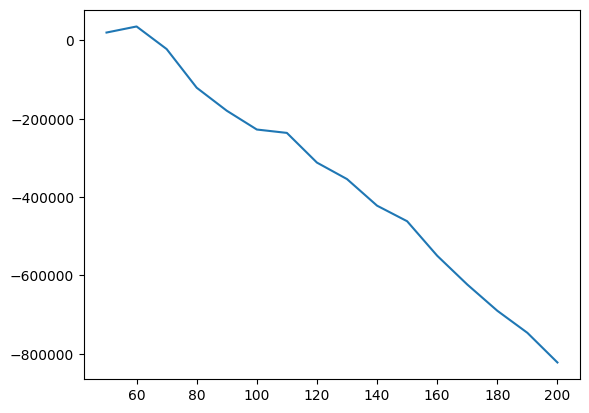

In [ ]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(Chlorine_pca).aic(Chlorine_pca) for model in models]
plt.plot(n_components, aics);

In [ ]:
gmm = GaussianMixture(200, covariance_type='full', random_state=0)
gmm.fit(Chlorine_pca)
print(gmm.converged_)

True


In [ ]:
Chlorine_pca_new = gmm.sample(149000)[0]
Chlorine_pca_new.shape

(149000, 2)

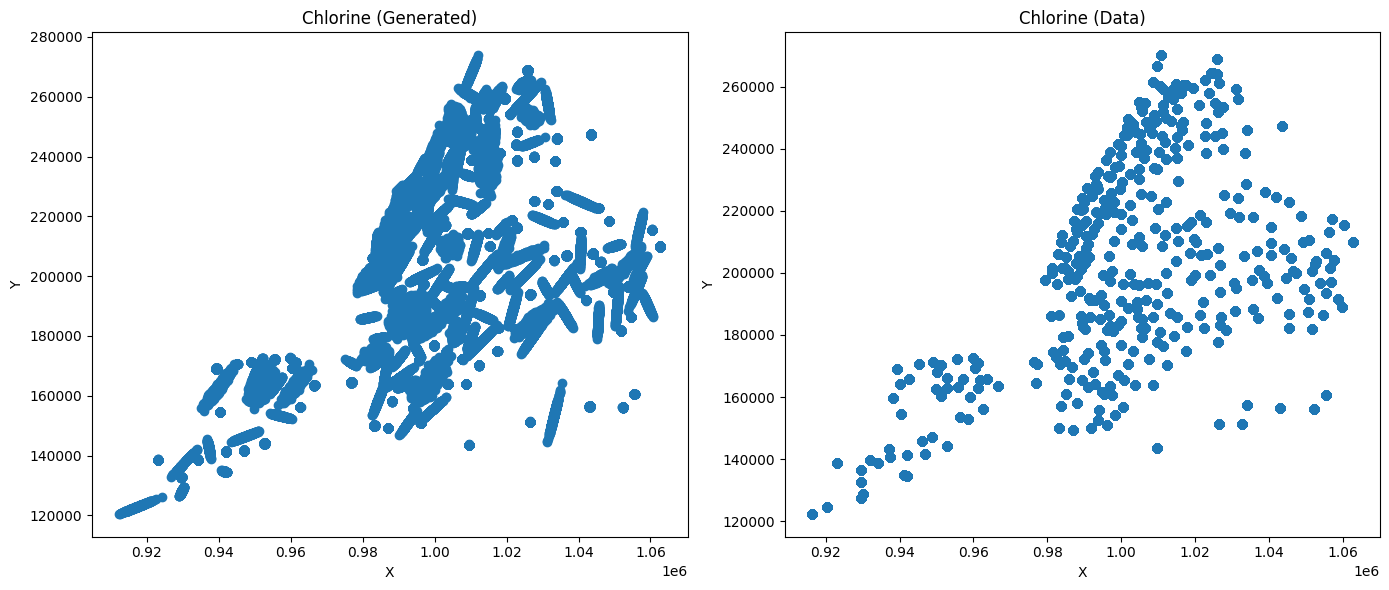

In [ ]:
Chlorine_new = pca.inverse_transform(Chlorine_pca_new)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(Chlorine_new[:, 0], Chlorine_new[:, 1])
plt.title('Chlorine (Generated)')
plt.xlabel('X')
plt.ylabel('Y')


# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Chlorine_data['X - Coordinate'], Chlorine_data['Y - Coordinate'])
plt.title('Chlorine (Data)')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

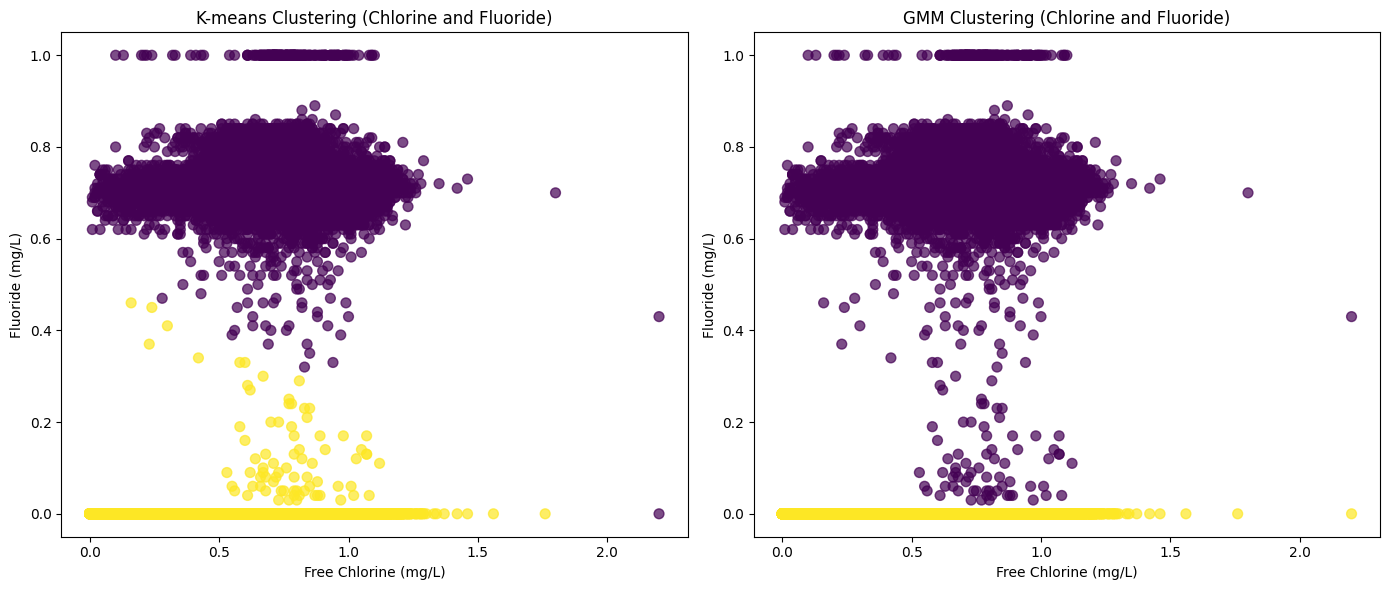

In [ ]:
Chlorine_Fluoride_data = data[['Residual Free Chlorine (mg/L)', 'Fluoride (mg/L)']].dropna()
Chlorine_Fluoride_cluster = Chlorine_Fluoride_data[['Residual Free Chlorine (mg/L)', 'Fluoride (mg/L)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(Chlorine_Fluoride_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(Chlorine_Fluoride_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Chlorine_Fluoride_data['Residual Free Chlorine (mg/L)'], Chlorine_Fluoride_data['Fluoride (mg/L)'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Chlorine and Fluoride)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Fluoride (mg/L)')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Chlorine_Fluoride_data['Residual Free Chlorine (mg/L)'], Chlorine_Fluoride_data['Fluoride (mg/L)'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Chlorine and Fluoride)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Fluoride (mg/L)')

plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(0.99, whiten = True)
Chlorine_Fluoride_pca = pca.fit_transform(Chlorine_Fluoride_cluster)
Chlorine_Fluoride_pca.shape

(149007, 2)

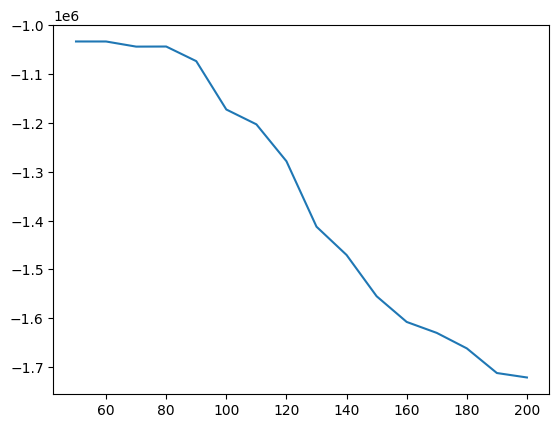

In [ ]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(Chlorine_Fluoride_pca).aic(Chlorine_Fluoride_pca) for model in models]
plt.plot(n_components, aics);

In [ ]:
gmm = GaussianMixture(200, covariance_type='full', random_state=0)
gmm.fit(Chlorine_Fluoride_pca)
print(gmm.converged_)

True


In [ ]:
Chlorine_Fluoride_pca_new = gmm.sample(149000)[0]
Chlorine_Fluoride_pca_new.shape

(149000, 2)

Text(0, 0.5, 'Fluoride (mg/L)')

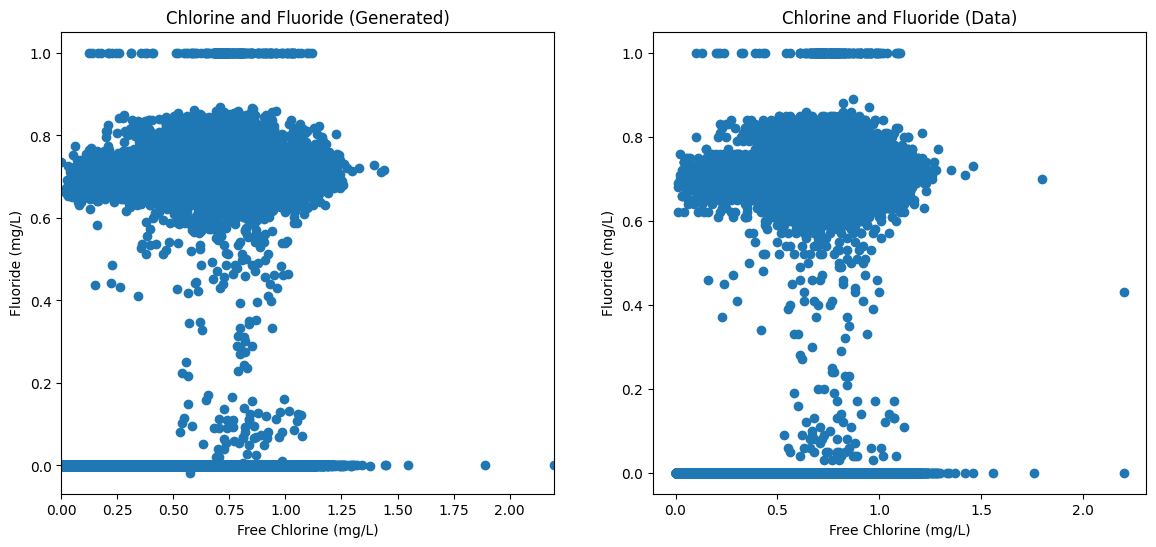

In [ ]:
Chlorine_Fluoride_new = pca.inverse_transform(Chlorine_Fluoride_pca_new)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(Chlorine_Fluoride_new[:, 0], Chlorine_Fluoride_new[:, 1])
plt.title('Chlorine and Fluoride (Generated)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Fluoride (mg/L)')
plt.xlim(0,2.2)

plt.subplot(1, 2, 2)
plt.scatter(Chlorine_Fluoride_data['Residual Free Chlorine (mg/L)'], Chlorine_Fluoride_data['Fluoride (mg/L)'])
plt.title('Chlorine and Fluoride (Data)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Fluoride (mg/L)')

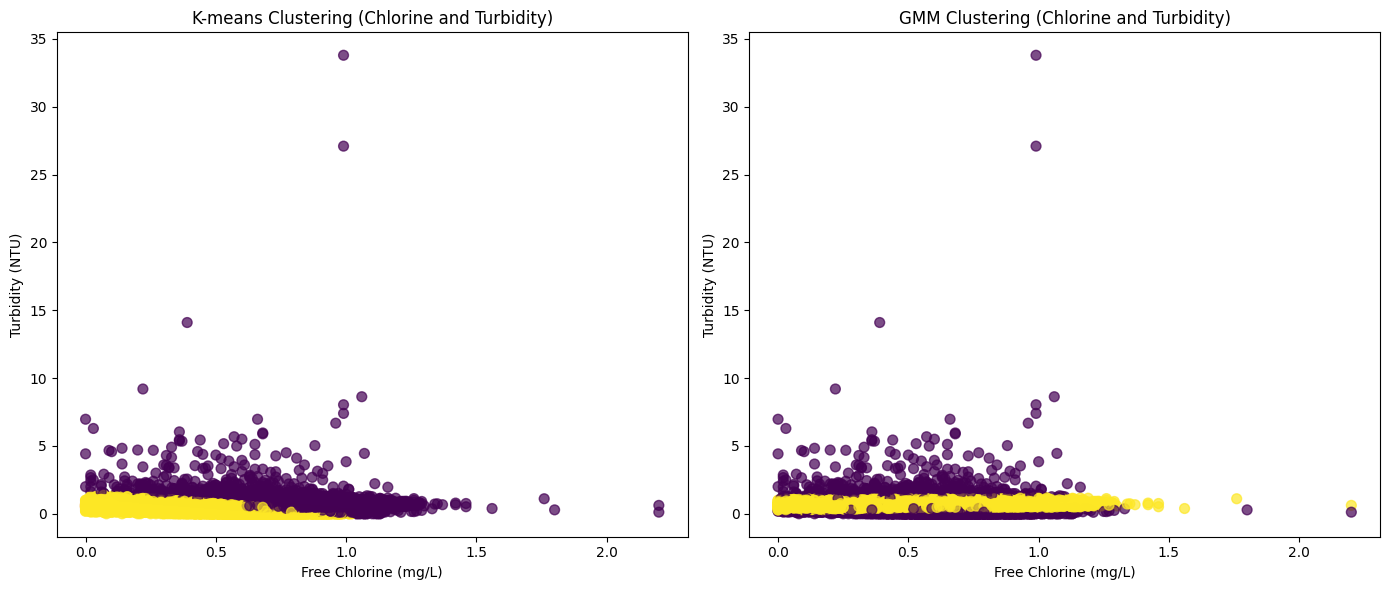

In [ ]:
Chlorine_Turbidity_data = data[['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)']].dropna()
Chlorine_Turbidity_cluster = Chlorine_Turbidity_data [['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(Chlorine_Turbidity_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(Chlorine_Turbidity_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Chlorine_Turbidity_data['Residual Free Chlorine (mg/L)'], Chlorine_Turbidity_data['Turbidity (NTU)'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Chlorine and Turbidity)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Turbidity (NTU)')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Chlorine_Turbidity_data['Residual Free Chlorine (mg/L)'], Chlorine_Turbidity_data['Turbidity (NTU)'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Chlorine and Turbidity)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Turbidity (NTU)')

plt.tight_layout()
plt.show()

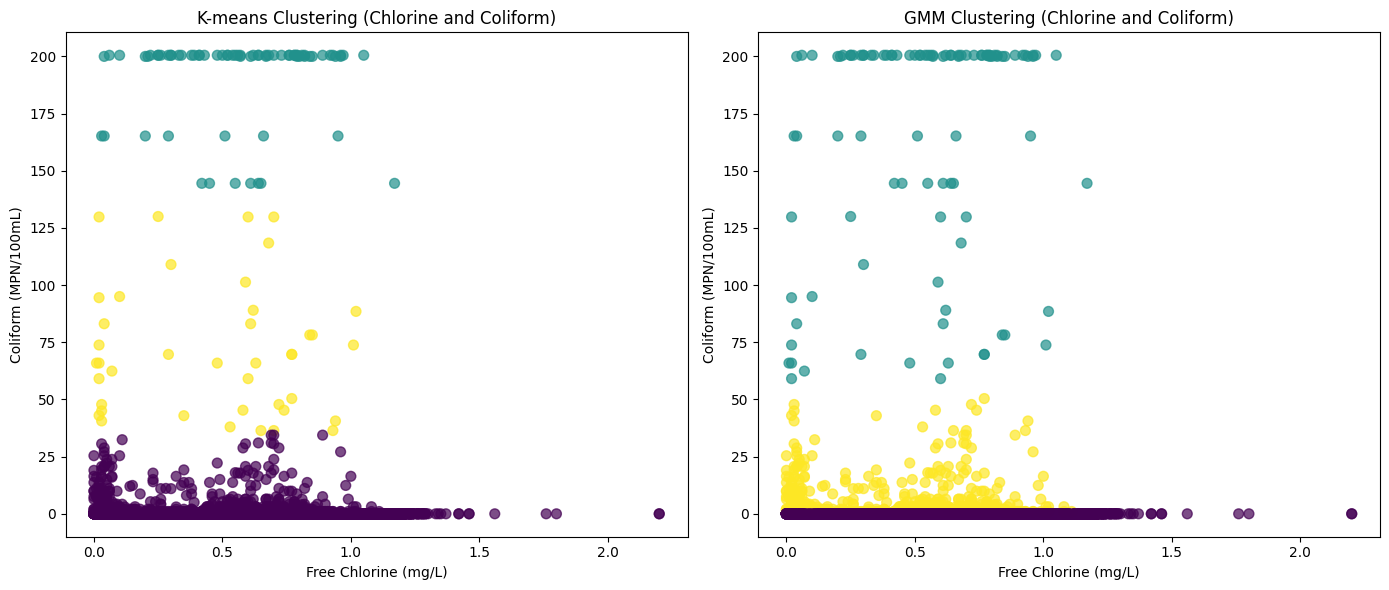

In [ ]:
Chlorine_Coliform_data = data[['Residual Free Chlorine (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)']].dropna()
Chlorine_Coliform_cluster = Chlorine_Coliform_data [['Residual Free Chlorine (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Chlorine_Coliform_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Chlorine_Coliform_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Chlorine_Coliform_data['Residual Free Chlorine (mg/L)'], Chlorine_Coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Chlorine and Coliform)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Coliform (MPN/100mL)')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Chlorine_Coliform_data['Residual Free Chlorine (mg/L)'], Chlorine_Coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Chlorine and Coliform)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Coliform (MPN/100mL)')

plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(0.99, whiten = True)
Chlorine_Coliform_pca = pca.fit_transform(Chlorine_Coliform_cluster)
Chlorine_Coliform_pca.shape

(148938, 1)

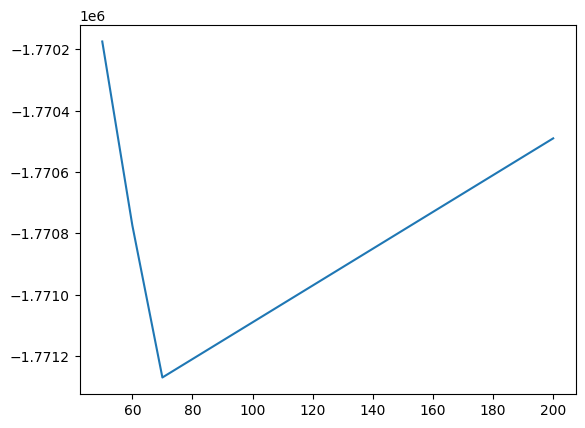

In [ ]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(Chlorine_Coliform_pca).aic(Chlorine_Coliform_pca) for model in models]
plt.plot(n_components, aics);

In [ ]:
gmm = GaussianMixture(400, covariance_type='full', random_state=0)
gmm.fit(Chlorine_Coliform_pca)
print(gmm.converged_)

True


In [ ]:
Chlorine_Coliform_pca_new = gmm.sample(148000)[0]
Chlorine_Coliform_pca_new.shape

(148000, 1)

Text(0, 0.5, 'Coliform (MPN/100mL)')

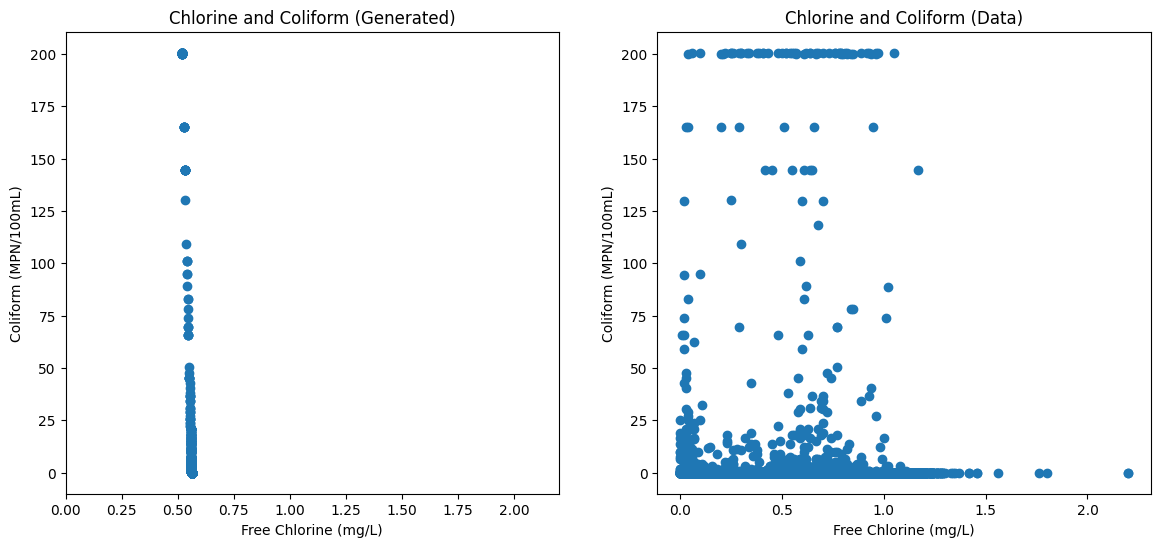

In [ ]:
Chlorine_Coliform_new = pca.inverse_transform(Chlorine_Coliform_pca_new)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(Chlorine_Coliform_new[:, 0], Chlorine_Coliform_new[:, 1])
plt.title('Chlorine and Coliform (Generated)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Coliform (MPN/100mL)')
plt.xlim(0,2.2)

plt.subplot(1, 2, 2)
plt.scatter(Chlorine_Coliform_data['Residual Free Chlorine (mg/L)'], Chlorine_Coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'])
plt.title('Chlorine and Coliform (Data)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Coliform (MPN/100mL)')

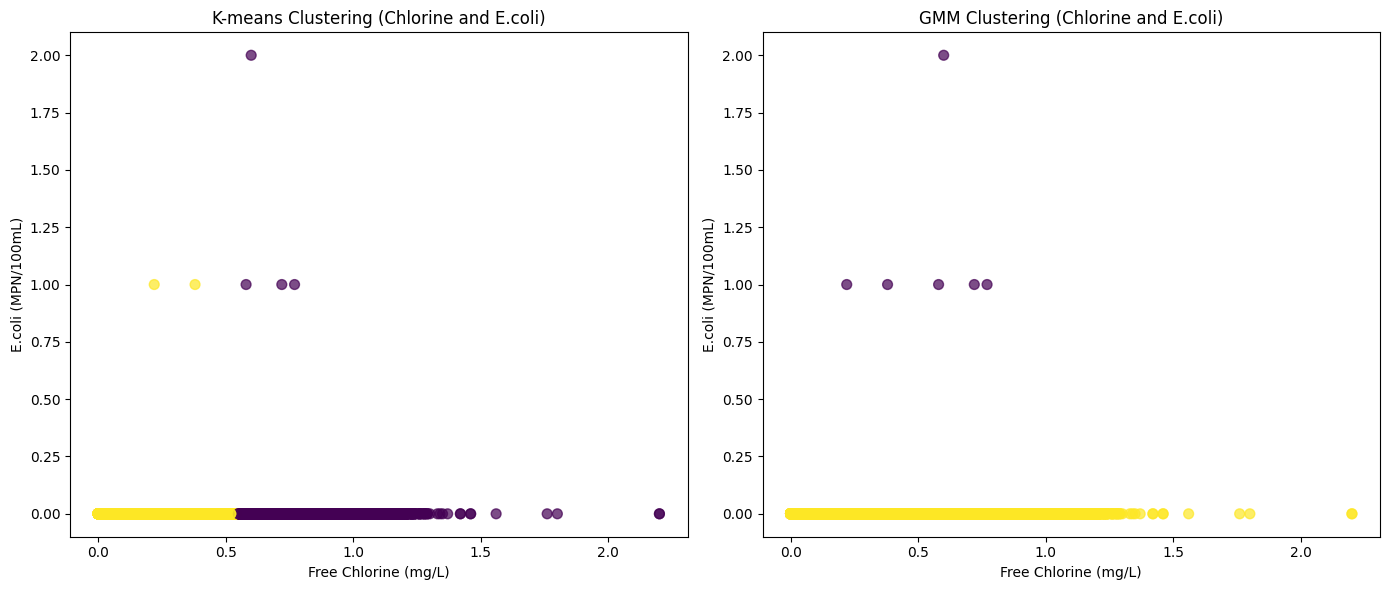

In [ ]:
Chlorine_ecoli_data = data[['Residual Free Chlorine (mg/L)', 'E.coli(Quanti-Tray) (MPN/100mL)']].dropna()
Chlorine_ecoli_cluster = Chlorine_ecoli_data [['Residual Free Chlorine (mg/L)', 'E.coli(Quanti-Tray) (MPN/100mL)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(Chlorine_ecoli_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(Chlorine_ecoli_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Chlorine_ecoli_data['Residual Free Chlorine (mg/L)'], Chlorine_ecoli_data['E.coli(Quanti-Tray) (MPN/100mL)'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Chlorine and E.coli)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('E.coli (MPN/100mL)')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Chlorine_ecoli_data['Residual Free Chlorine (mg/L)'], Chlorine_ecoli_data['E.coli(Quanti-Tray) (MPN/100mL)'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Chlorine and E.coli)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('E.coli (MPN/100mL)')

plt.tight_layout()
plt.show()

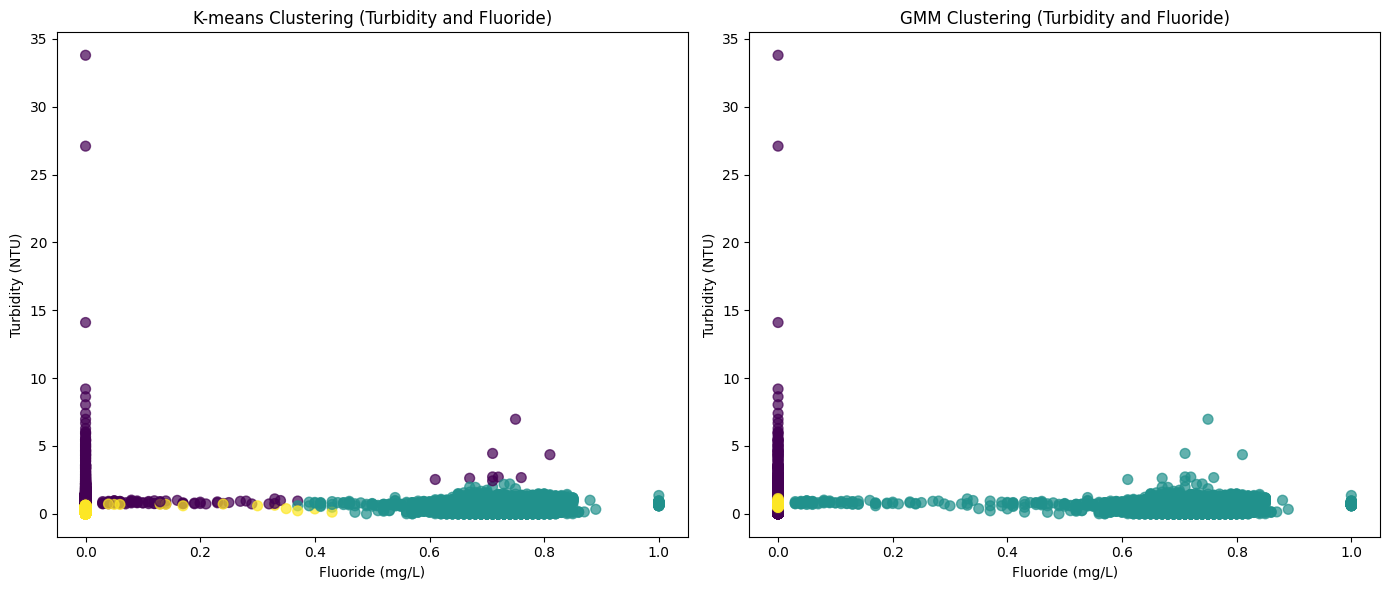

In [ ]:
Turbidity__fluoride_data = data[['Turbidity (NTU)','Fluoride (mg/L)']].dropna()
Turbidity__fluoride_cluster = Turbidity__fluoride_data [['Turbidity (NTU)','Fluoride (mg/L)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Turbidity__fluoride_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Turbidity__fluoride_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Turbidity__fluoride_data['Fluoride (mg/L)'],Turbidity__fluoride_data['Turbidity (NTU)'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Turbidity and Fluoride)')
plt.xlabel('Fluoride (mg/L)')
plt.ylabel('Turbidity (NTU)')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Turbidity__fluoride_data['Fluoride (mg/L)'],Turbidity__fluoride_data['Turbidity (NTU)'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Turbidity and Fluoride)')
plt.xlabel('Fluoride (mg/L)')
plt.ylabel('Turbidity (NTU)')

plt.tight_layout()
plt.show()

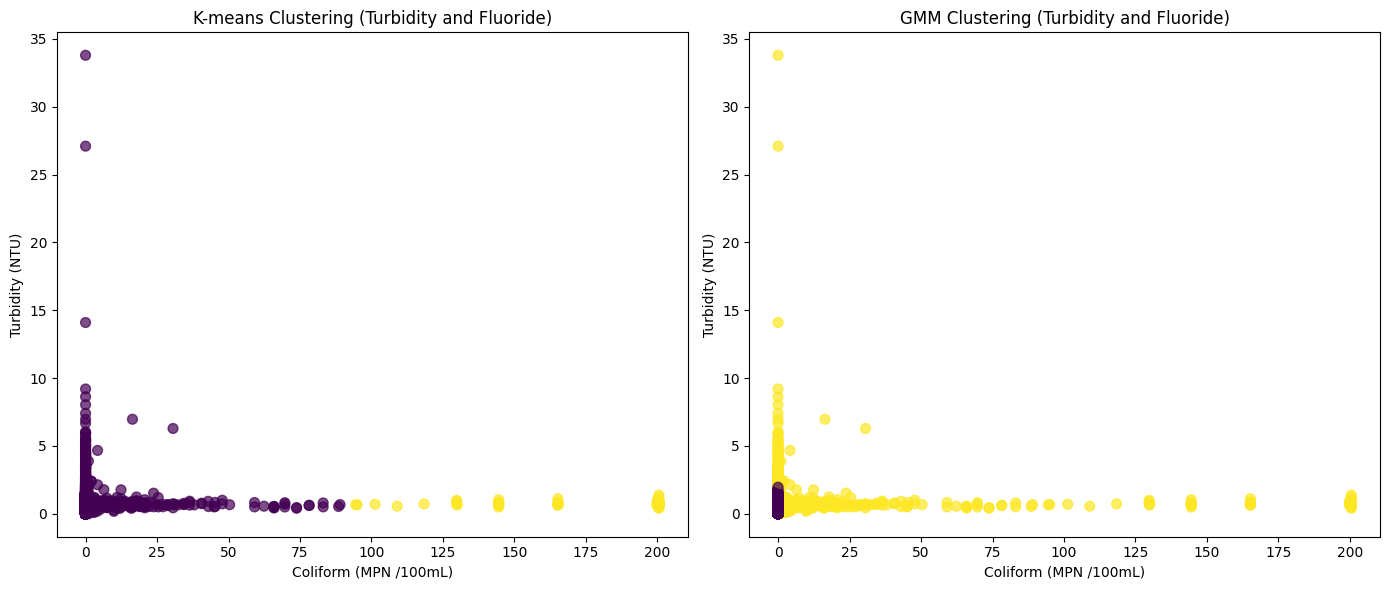

In [ ]:
Turbidity__coliform_data = data[['Turbidity (NTU)','Coliform (Quanti-Tray) (MPN /100mL)']].dropna()
Turbidity__coliform_cluster = Turbidity__coliform_data [['Turbidity (NTU)','Coliform (Quanti-Tray) (MPN /100mL)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(Turbidity__coliform_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(Turbidity__coliform_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Turbidity__coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'],Turbidity__coliform_data['Turbidity (NTU)'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Turbidity and Fluoride)')
plt.xlabel('Coliform (MPN /100mL)')
plt.ylabel('Turbidity (NTU)')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Turbidity__coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'],Turbidity__coliform_data['Turbidity (NTU)'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Turbidity and Fluoride)')
plt.xlabel('Coliform (MPN /100mL)')
plt.ylabel('Turbidity (NTU)')

plt.tight_layout()
plt.show()

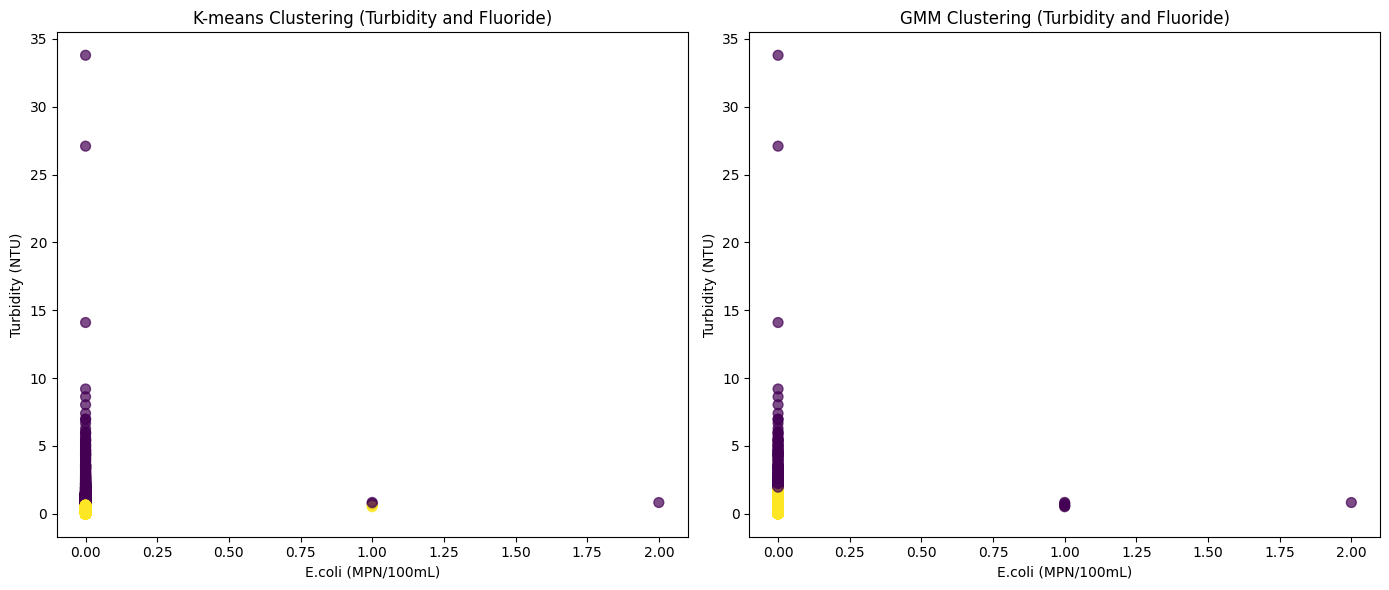

In [ ]:
Turbidity_ecoli_data = data[['Turbidity (NTU)','E.coli(Quanti-Tray) (MPN/100mL)']].dropna()
Turbidity_ecoli_cluster = Turbidity_ecoli_data [['Turbidity (NTU)','E.coli(Quanti-Tray) (MPN/100mL)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(Turbidity_ecoli_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(Turbidity_ecoli_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Turbidity_ecoli_data['E.coli(Quanti-Tray) (MPN/100mL)'],Turbidity_ecoli_data['Turbidity (NTU)'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Turbidity and Fluoride)')
plt.xlabel('E.coli (MPN/100mL)')
plt.ylabel('Turbidity (NTU)')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Turbidity_ecoli_data['E.coli(Quanti-Tray) (MPN/100mL)'],Turbidity_ecoli_data['Turbidity (NTU)'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Turbidity and Fluoride)')
plt.xlabel('E.coli (MPN/100mL)')
plt.ylabel('Turbidity (NTU)')

plt.tight_layout()
plt.show()

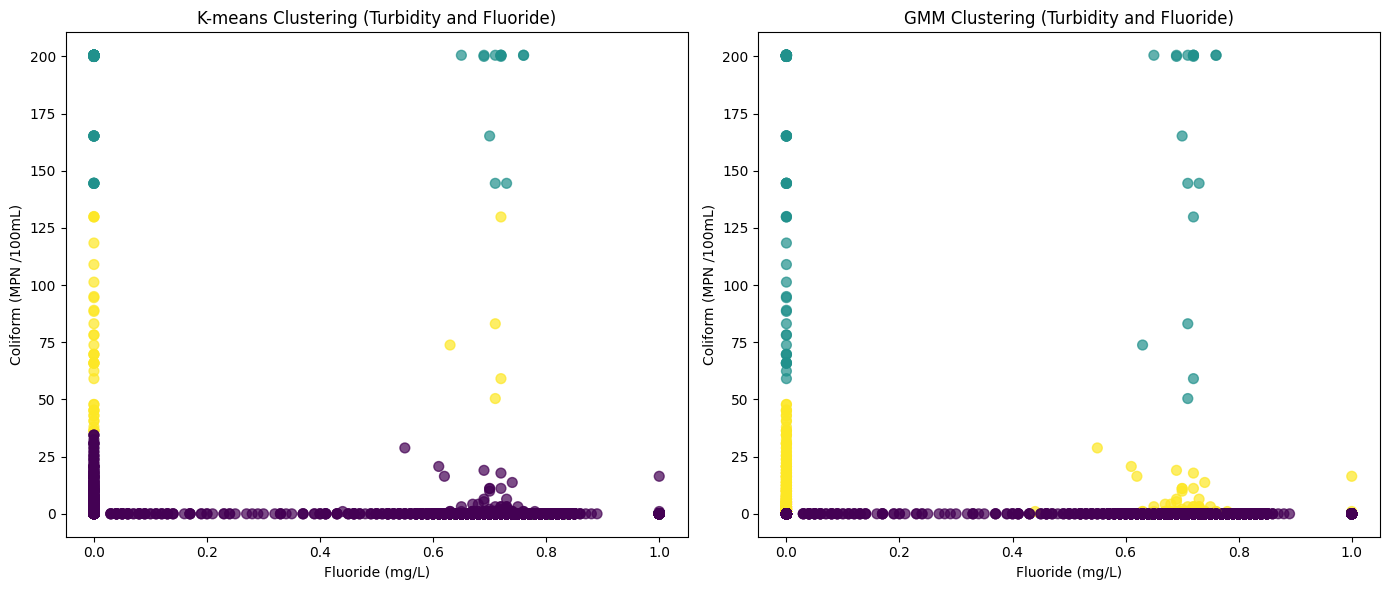

In [ ]:
Fluoride_coliform_data = data[['Fluoride (mg/L)','Coliform (Quanti-Tray) (MPN /100mL)']].dropna()
Fluoride_coliform_cluster = Fluoride_coliform_data [['Fluoride (mg/L)','Coliform (Quanti-Tray) (MPN /100mL)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Fluoride_coliform_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Fluoride_coliform_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Fluoride_coliform_data['Fluoride (mg/L)'],Fluoride_coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Turbidity and Fluoride)')
plt.xlabel('Fluoride (mg/L)')
plt.ylabel('Coliform (MPN /100mL)')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Fluoride_coliform_data['Fluoride (mg/L)'],Fluoride_coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Turbidity and Fluoride)')
plt.xlabel('Fluoride (mg/L)')
plt.ylabel('Coliform (MPN /100mL)')

plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(0.99, whiten = True)
Fluoride_coliform_pca = pca.fit_transform(Fluoride_coliform_cluster)
Fluoride_coliform_pca.shape

(148940, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning:

Number of distinct clusters (198) found smaller than n_clusters (200). Possibly due to duplicate points in X.



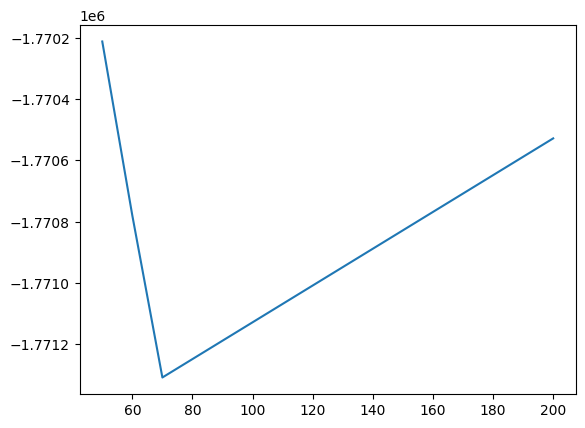

In [ ]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(Fluoride_coliform_pca).aic(Fluoride_coliform_pca) for model in models]
plt.plot(n_components, aics);

In [ ]:
gmm = GaussianMixture(70, covariance_type='full', random_state=0)
gmm.fit(Fluoride_coliform_pca)
print(gmm.converged_)

True


In [ ]:
Fluoride_coliform_pca_new = gmm.sample(148000)[0]
Fluoride_coliform_pca_new.shape

(148000, 1)

Text(0, 0.5, 'Coliform (MPN /100mL)')

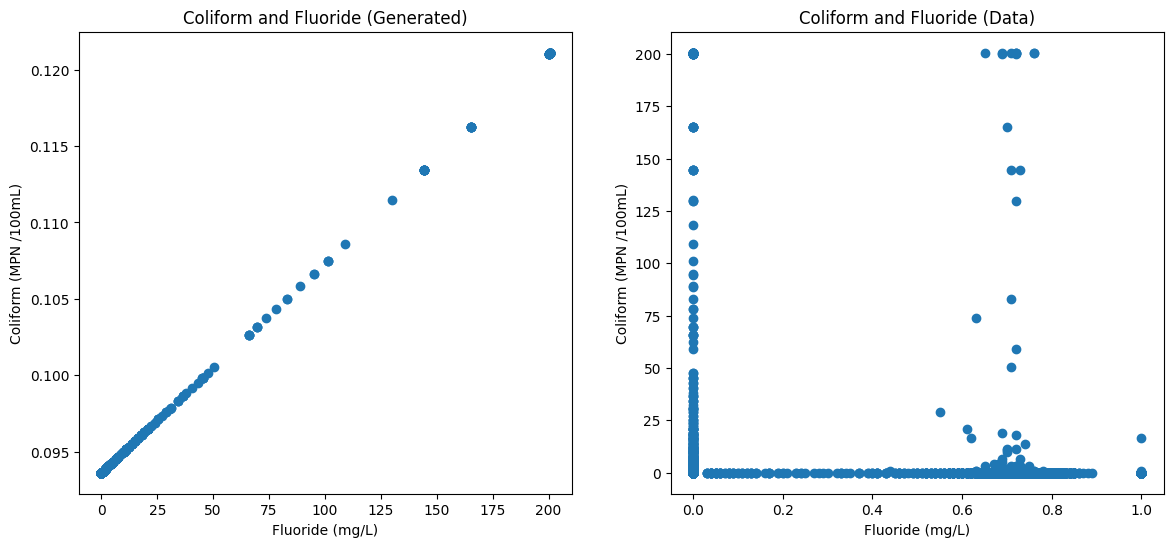

In [ ]:
Fluoride_coliform_new = pca.inverse_transform(Fluoride_coliform_pca_new)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(Fluoride_coliform_new[:, 1], Fluoride_coliform_new[:, 0])
plt.title('Coliform and Fluoride (Generated)')
plt.xlabel('Fluoride (mg/L)')
plt.ylabel('Coliform (MPN /100mL)')

plt.subplot(1, 2, 2)
plt.scatter(Fluoride_coliform_data['Fluoride (mg/L)'],Fluoride_coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'])
plt.title('Coliform and Fluoride (Data)')
plt.xlabel('Fluoride (mg/L)')
plt.ylabel('Coliform (MPN /100mL)')

In [ ]:
Chlorine_Coliform_data = data[['Residual Free Chlorine (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)']].dropna()
Chlorine_Coliform_cluster = Chlorine_Coliform_data [['Residual Free Chlorine (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Chlorine_Coliform_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Chlorine_Coliform_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Chlorine_Coliform_data['Residual Free Chlorine (mg/L)'], Chlorine_Coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Chlorine and Coliform)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Coliform (MPN/100mL)')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Chlorine_Coliform_data['Residual Free Chlorine (mg/L)'], Chlorine_Coliform_data['Coliform (Quanti-Tray) (MPN /100mL)'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Chlorine and Coliform)')
plt.xlabel('Free Chlorine (mg/L)')
plt.ylabel('Coliform (MPN/100mL)')

plt.tight_layout()
plt.show()

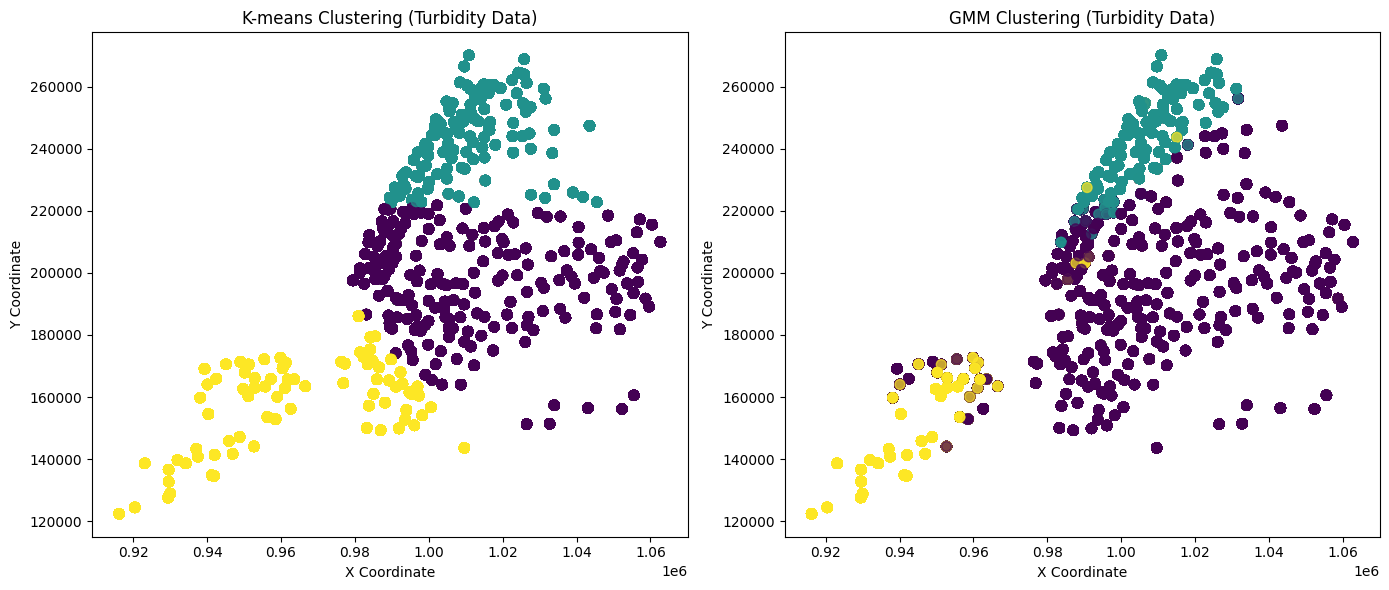

In [ ]:
# Turbidity clustering data
Turbidity_data = data[['X - Coordinate', 'Y - Coordinate', 'Turbidity (NTU)']].dropna()
Turbidity_cluster = Turbidity_data[['X - Coordinate', 'Y - Coordinate', 'Turbidity (NTU)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Turbidity_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Turbidity_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Turbidity_data['X - Coordinate'], Turbidity_data['Y - Coordinate'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Turbidity Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Turbidity_data['X - Coordinate'], Turbidity_data['Y - Coordinate'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Turbidity Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

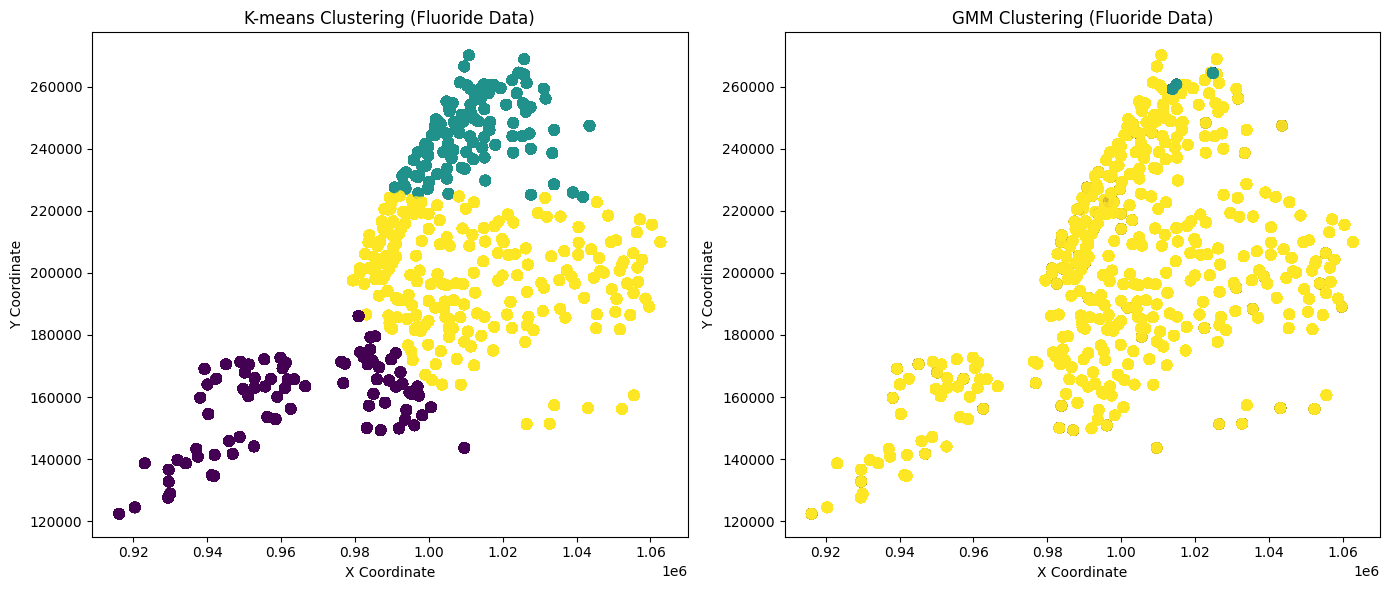

In [ ]:
# Fluoride clustering data
Fluoride_data = data[['X - Coordinate', 'Y - Coordinate', 'Fluoride (mg/L)']].dropna()
Fluoride_cluster = Fluoride_data[['X - Coordinate', 'Y - Coordinate', 'Fluoride (mg/L)']].values

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Fluoride_cluster)

plt.figure()

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Fluoride_data['X - Coordinate'], Fluoride_data['Y - Coordinate'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Fluoride Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

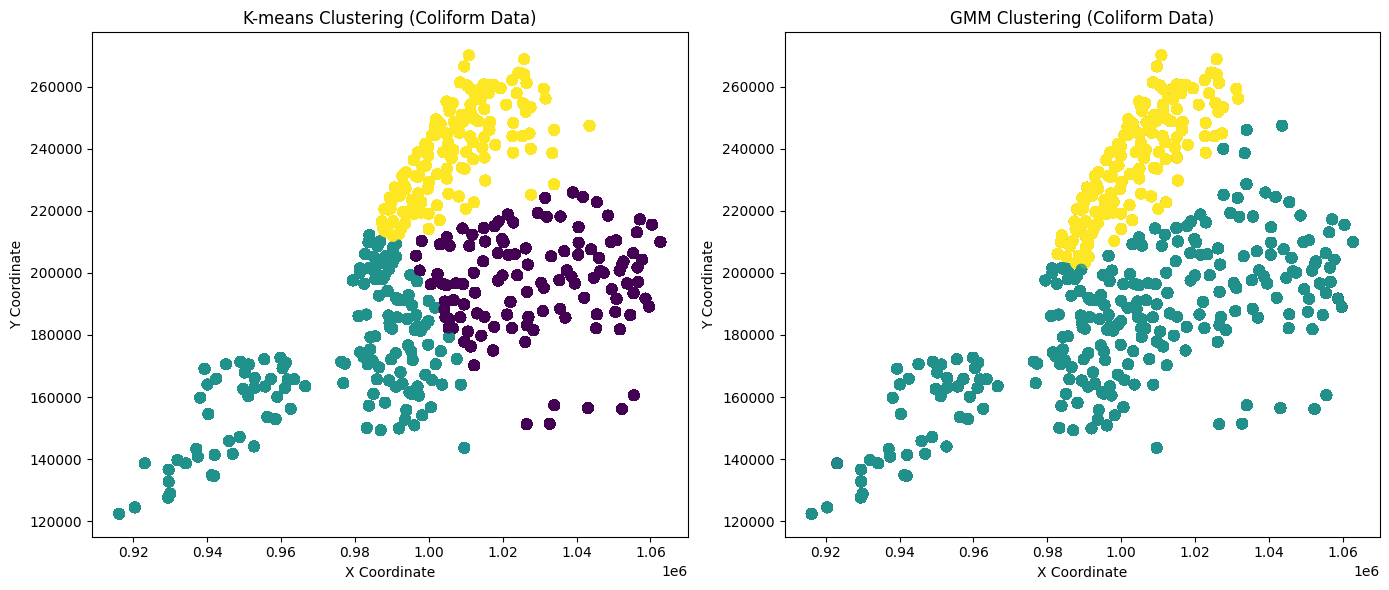

In [ ]:
# Coliform clustering data
Coliform_data = data[['X - Coordinate', 'Y - Coordinate', 'Coliform (Quanti-Tray) (MPN /100mL)']].dropna()
Coliform_cluster = Coliform_data[['X - Coordinate', 'Y - Coordinate', 'Coliform (Quanti-Tray) (MPN /100mL)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Coliform_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Coliform_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Coliform_data['X - Coordinate'], Coliform_data['Y - Coordinate'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (Coliform Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Coliform_data['X - Coordinate'], Coliform_data['Y - Coordinate'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (Coliform Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()

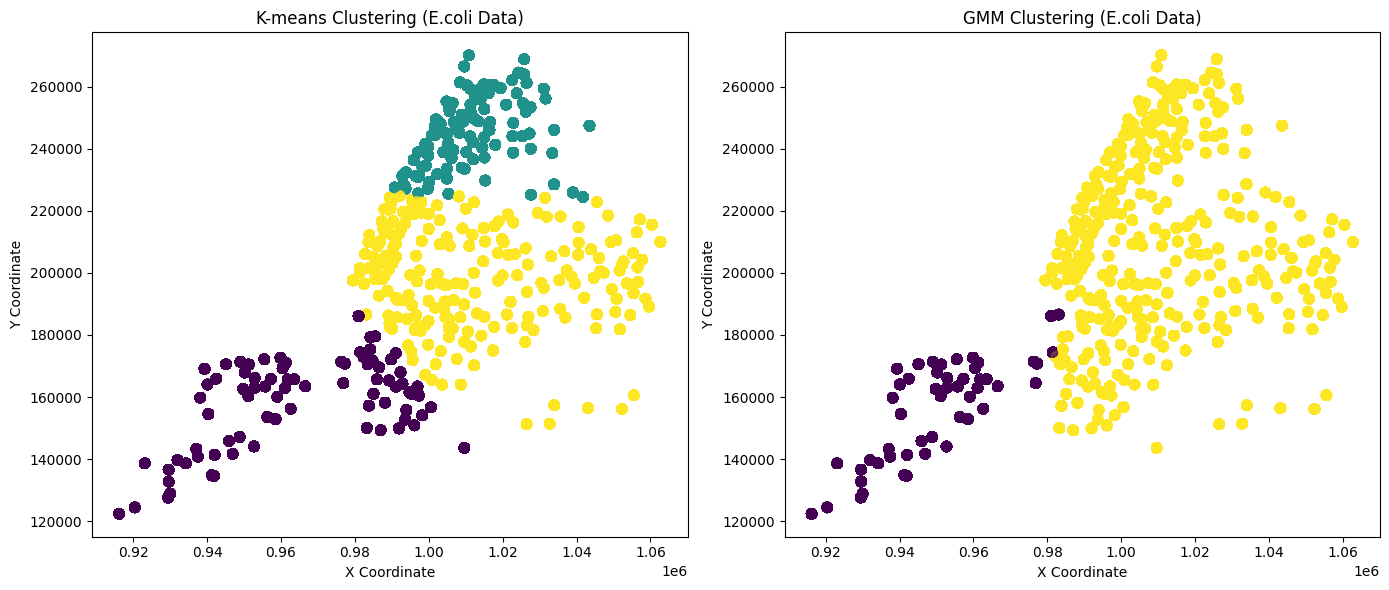

In [ ]:
# Ecoli clustering data
Ecoli_data = data[['X - Coordinate', 'Y - Coordinate', 'E.coli(Quanti-Tray) (MPN/100mL)']].dropna()
Ecoli_cluster = Ecoli_data[['X - Coordinate', 'Y - Coordinate', 'E.coli(Quanti-Tray) (MPN/100mL)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(Ecoli_cluster)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(Ecoli_cluster)

# Plotting K-means clustering
plt.figure(figsize=(14, 6))

# K-means clustering
plt.subplot(1, 2, 1)
plt.scatter(Ecoli_data['X - Coordinate'], Ecoli_data['Y - Coordinate'],
            c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (E.coli Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# GMM clustering
plt.subplot(1, 2, 2)
plt.scatter(Ecoli_data['X - Coordinate'], Ecoli_data['Y - Coordinate'],
            c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('GMM Clustering (E.coli Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.show()